# ecoli

In [1]:
from __future__ import absolute_import, print_function, division
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cobra
import roadrunner

from IPython.display import display, HTML

import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba.simulator import simulate_dfba
from sbmlutils.dfba import utils
from sbmlutils.dfba import analysis

analysis.set_matplotlib_parameters()

print('sbmlutils:', sbmlutils.__version__)
print('cobra:', cobra.__version__)
print('roadrunner:', roadrunner.__version__)

print(os.getcwd())

sbmlutils: 0.1.7a2
cobra: 0.9.1
roadrunner: 1.4.24
/home/mkoenig/git/dfba/models/ecoli


## Simulation settings

In [2]:
model_id = "ecoli"
tend = 3.5
dt = 0.01

In [3]:
def plot_results(df, mid):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    kwargs = {}

    sids_main = ['for_e', 'lac__D_e', 'pyr_e', 'etoh_e', 'gln__L_e', 'akg_e', 'acald_e', 'glu__L_e', 'mal__L_e', 'X',
                 'fum_e', 'fru_e', 'succ_e', 'ac_e', 'glc__D_e']
    sids_cofactor = ['pi_e', 'h_e', 'o2_e', 'co2_e', 'h2o_e', 'nh4_e']

    for sid in sids_main:
        for ax in (ax1, ax2):
            ax.plot(df.time, df['[{}]'.format(sid)], label="[{}]".format(sid), **kwargs)

    for sid in sids_cofactor:
        for ax in (ax3, ax4):
            ax.plot(df.time, df['[{}]'.format(sid)], label="[{}]".format(sid), **kwargs)

    for ax in (ax2, ax4):
        ax.set_yscale('log')

    for ax in (ax1, ax2, ax3, ax4):
        ax.set_title(mid)
        ax.set_ylabel('Concentrations')
        ax.set_xlabel('time [h]')
        ax.legend()
    plt.show()
    return fig

## mk model

./mk/v6/ecoli_top.xml
ecoli_mk_v6-sbmlutils_dt0.01_tend3.5

Simulation time     : 19.937 [s]
Total time          : 21.050 [s]
Overhead time       : 1.112 [s] (5.3 %)



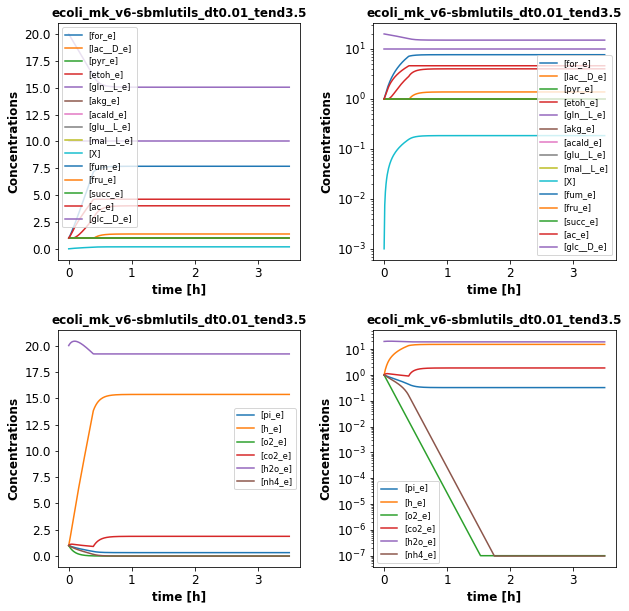

,time,[X],[ac_e],[acald_e],[akg_e],[co2_e],[dummy_S],[etoh_e],[fba__M_13dpg_c],[fba__M_2pg_c],...,ub_EX_glu__L_e,ub_EX_h2o_e,ub_EX_h_e,ub_EX_lac__D_e,ub_EX_mal__L_e,ub_EX_nh4_e,ub_EX_o2_e,ub_EX_pi_e,ub_EX_pyr_e,ub_EX_succ_e
0.00,0.00,0.001000,1.000000,1.0,1.0,1.000000,0.0,1.000000,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.01,0.01,0.007499,1.082647,1.0,1.0,1.056904,0.0,1.000000,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.02,0.02,0.013674,1.172730,1.0,1.0,1.094100,0.0,1.000000,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.03,0.03,0.019556,1.271809,1.0,1.0,1.118165,0.0,1.000000,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.04,0.04,0.025174,1.378985,1.0,1.0,1.130413,0.0,1.000000,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.05,0.05,0.030556,1.493447,1.0,1.0,1.132026,0.0,1.000000,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.06,0.06,0.035725,1.614468,1.0,1.0,1.124066,0.0,1.000000,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.07,0.07,0.040684,1.732553,1.0,1.0,1.115206,0.0,1.006546,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.08,0.08,0.045451,1.846677,1.0,1.0,1.106688,0.0,1.019962,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
0.09,0.09,0.050047,1.957234,1.0,1.0,1.098477,0.0,1.039560,0.0,0.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0


In [4]:
version_mk = 'v6'
sbml_mk = './mk/{}/ecoli_top.xml'.format(version_mk)
mid_mk = '{}_mk_{}-sbmlutils_dt{}_tend{}'.format(model_id, version_mk, dt, tend)
print(sbml_mk)
print(mid_mk)

# simulation 
df_mk, dfba_model_mk, dfba_simulator_mk = simulate_dfba(sbml_mk, tend=tend, dt=dt)

# figures
fig = plot_results(df_mk, mid_mk)
fig.savefig('./{}.png'.format(mid_mk), bbox_inches='tight')
fig.savefig('./{}.pdf'.format(mid_mk), bbox_inches='tight')

# results
df_mk.to_csv('./{}.csv'.format(mid_mk))
display(df_mk)